In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Path to sledgehamr top directory
sys.path.append('../../sledgehamr')
import pySledgehamr as sledgehamr

exec_dir = "../examples/MinimalExample/"

### Step 1: Create Initial State

In [6]:
strings = sledgehamr.AxionStrings()
strings.CreateInitialState(L=15, N=256, k_max=5, t_start=0.1, output_file=exec_dir+'initial_state_256.hdf5') 

Generate Psi1 ...
Generate Psi2 ...
Generate Pi1 ...
Generate Pi2 ...
Done.


### Step 2: Run the simulation. 
Follow instructions in 'examples/MinimalExample/README'.

### Step 3: Plot Output

In [11]:
out = sledgehamr.Output('/global/cfs/cdirs/m3166/buschman/sledgehamr/examples/MinimalExample/output')

print()

times = out.GetTimesOfSlices()
print('Slices written at \tt =', times)

times = out.GetTimesOfCoarseBoxes()
print('Coarse boxes written at t =', times)

times = out.GetTimesOfFullBoxes()
print('Full boxes written at \tt =', times)

times = out.GetTimesOfProjections()
print('Projections written at \tt =', times)

times = out.GetTimesOfSpectra()
print('Spectra written at \tt =', times)

times = out.GetTimesOfSlicesTruncationError()
print('Slices of truncation errors written at \t\tt =', times)

times = out.GetTimesOfCoarseBoxesTruncationError()
print('Coarse boxes of truncation errors written at \tt =', times)

times = out.GetTimesOfFullBoxesTruncationError()
print('Full boxes of truncation errors written at \tt =', times)

Number of slices found: 15
Number of coarse boxes found: 15
Number of full boxes found: 12
Number of projections found: 0
Number of spectra found: 0
Number of gravitational wave spectra found: 0
Number of slices of truncation errors found: 0
Number of coarse boxes of truncation errors found: 0
Number of full boxes of truncation errors found: 0

Slices written at 	t = [0.11757813 0.62734375 1.13710938 1.646875   2.15664063 2.66640625
 3.17617188 3.6859375  4.19570312 4.70546875 5.21523437 5.725
 6.23476562 6.74453125 7.00820312]
Coarse boxes written at t = [0.11757813 0.62734375 1.13710938 1.646875   2.15664063 2.66640625
 3.17617188 3.6859375  4.19570312 4.70546875 5.21523437 5.725
 6.23476562 6.74453125 7.00820312]
Full boxes written at 	t = [0.39882812 0.99648437 1.59414063 2.19179688 2.78945313 3.38710938
 3.98476563 4.58242187 5.18007812 5.77773437 6.37539062 6.97304687]
Projections written at 	t = None
Spectra written at 	t = None
Slices of truncation errors written at 		t = None


t=4.70546875


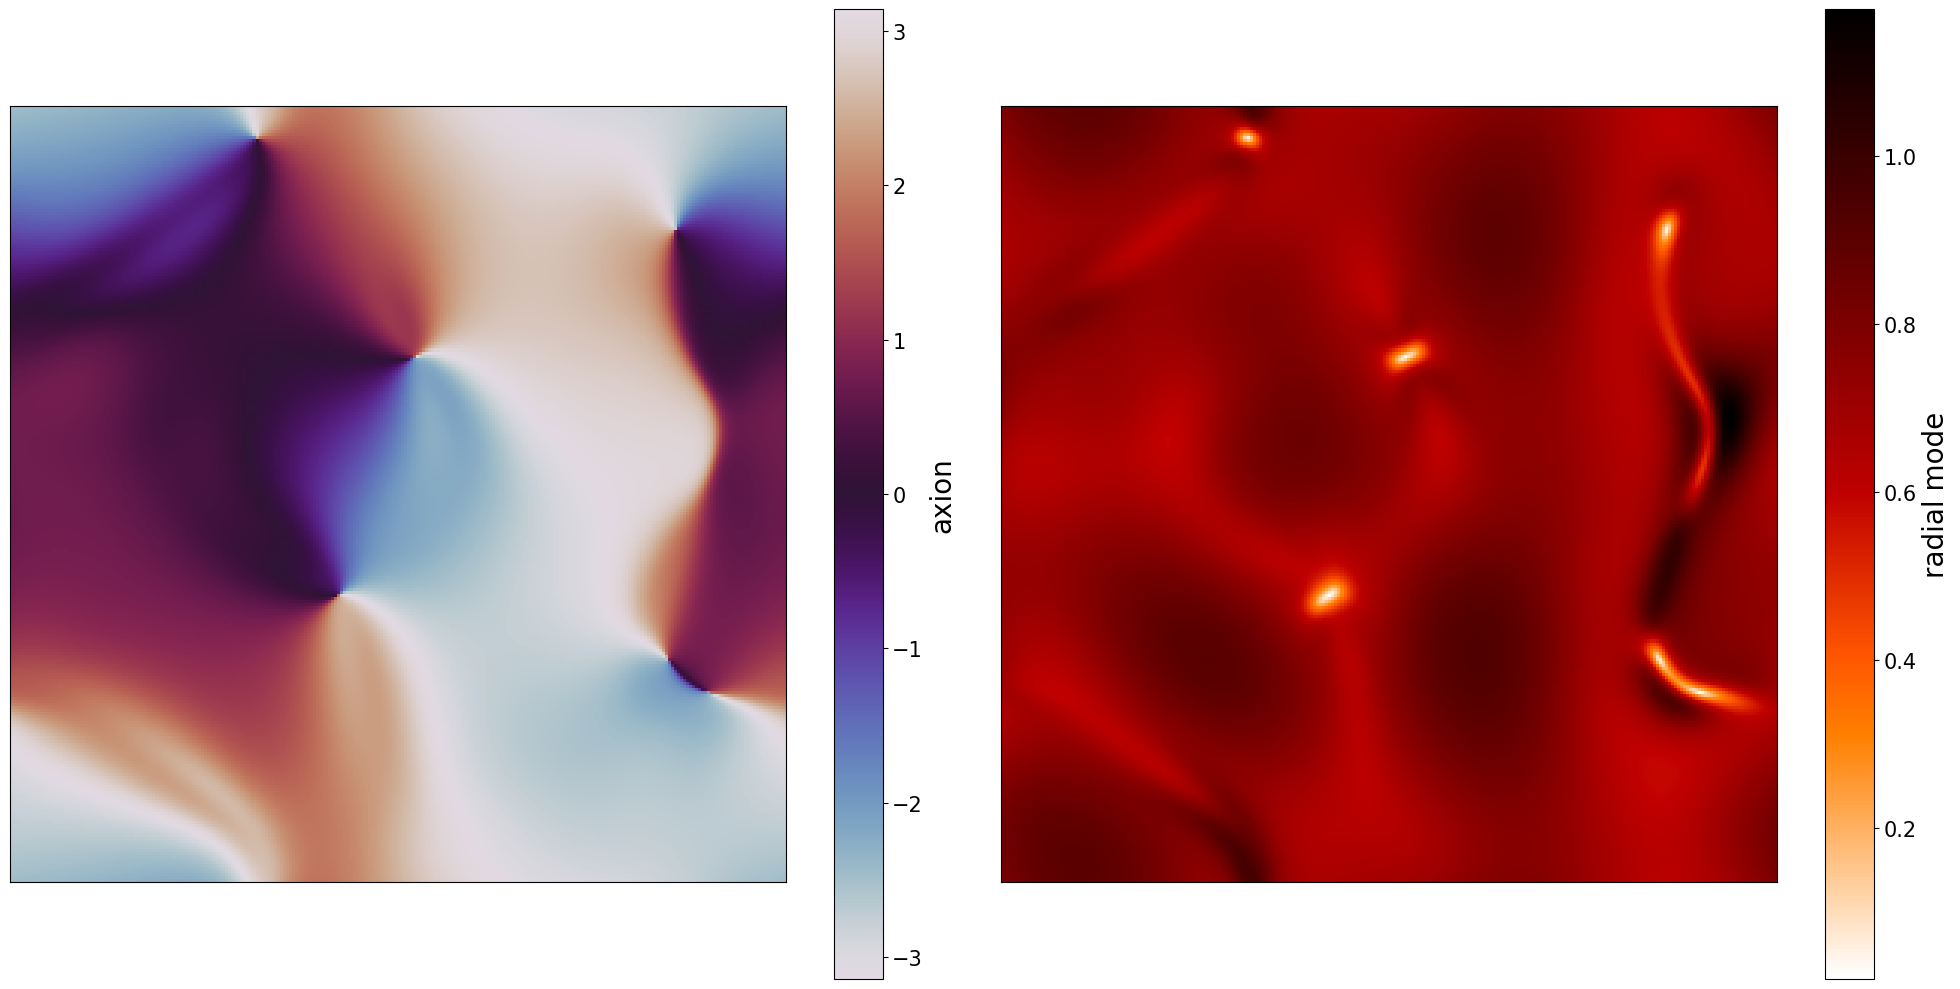

In [12]:
# id of slice to be plotted
i = 9
lev = 0

# Read a slice along the x-axis.
slices = out.GetSlice(i, 'x', lev, ['Psi1', 'Psi2'])
t = slices['t']
print('t='+str(t))

axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

In [13]:
out = sledgehamr.Output('/global/cfs/cdirs/m3166/buschman/sledgehamr/examples/MinimalExample/output_cpu')

Number of slices found: 11
Number of coarse boxes found: 2
Number of full boxes found: 0
Number of projections found: 0
Number of spectra found: 0
Number of gravitational wave spectra found: 0
Number of slices of truncation errors found: 0
Number of coarse boxes of truncation errors found: 0
Number of full boxes of truncation errors found: 0


t=4.687890625


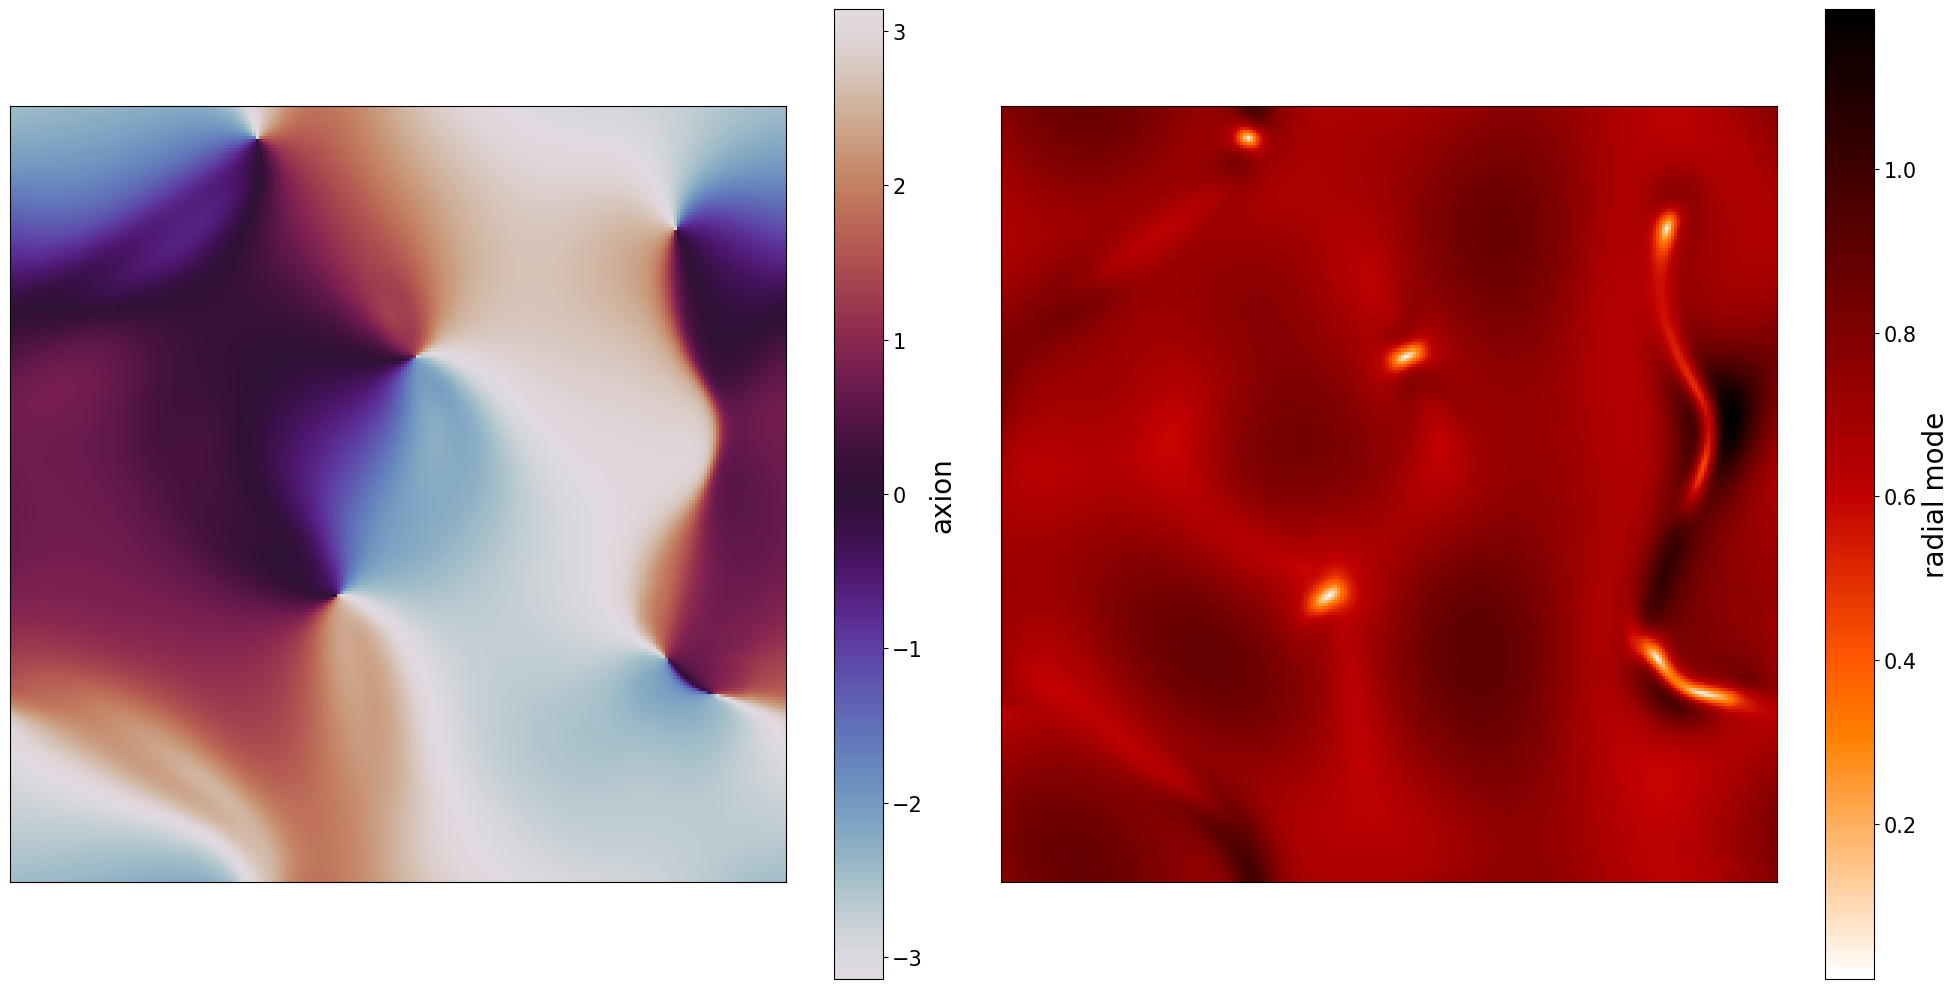

In [14]:
# id of slice to be plotted
i = 9
lev = 0

# Read a slice along the x-axis.
slices = out.GetSlice(i, 'x', lev, ['Psi1', 'Psi2'])
t = slices['t']
print('t='+str(t))

axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

6.902734375
(array([ 61,  62,  62, ..., 503, 503, 503]), array([376, 376, 377, ..., 101, 102, 103]))


(0.0, 512.0)

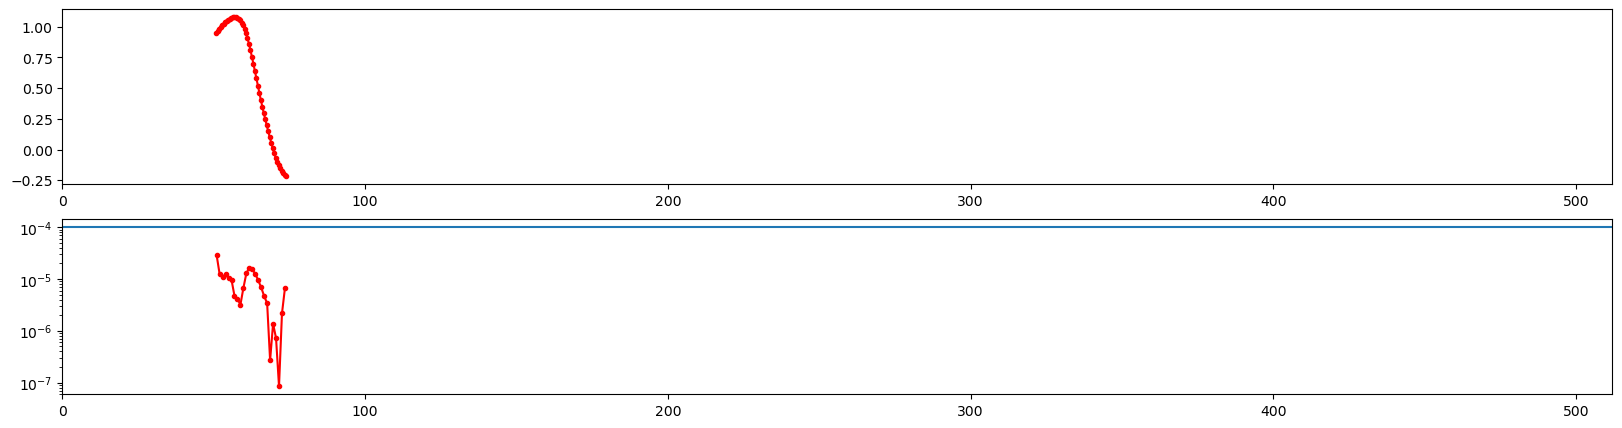

In [43]:
fig, ax = plt.subplots(figsize=(20,5), nrows=2)

index = 14
lev = 1
name = 'Psi1'
slices_1 = out.GetSliceTruncationError(index, 'z', lev, [name])
t=slices_1['t'] 
print(t)
print(np.where(slices_1[name][:,:]>0))
slic = 200

ax[0].plot(np.linspace(0,250,len(slices_1[name][slic,:])),slices_1[name][slic,:], marker='.', linestyle='-', color='red')
ax[1].plot(np.linspace(0,250,len(slices_1[name][slic,::2])),slices_1[name+'_truncation_error'][slic//2,:], marker='.', linestyle='-', color='red')
ax[1].axhline(1e-4)
ax[1].set_yscale('log')
#ax[1].set_ylim(1e-6,1e-2)
ax[0].set_xlim(0,256*2**lev)
ax[1].set_xlim(0,256*2**lev)

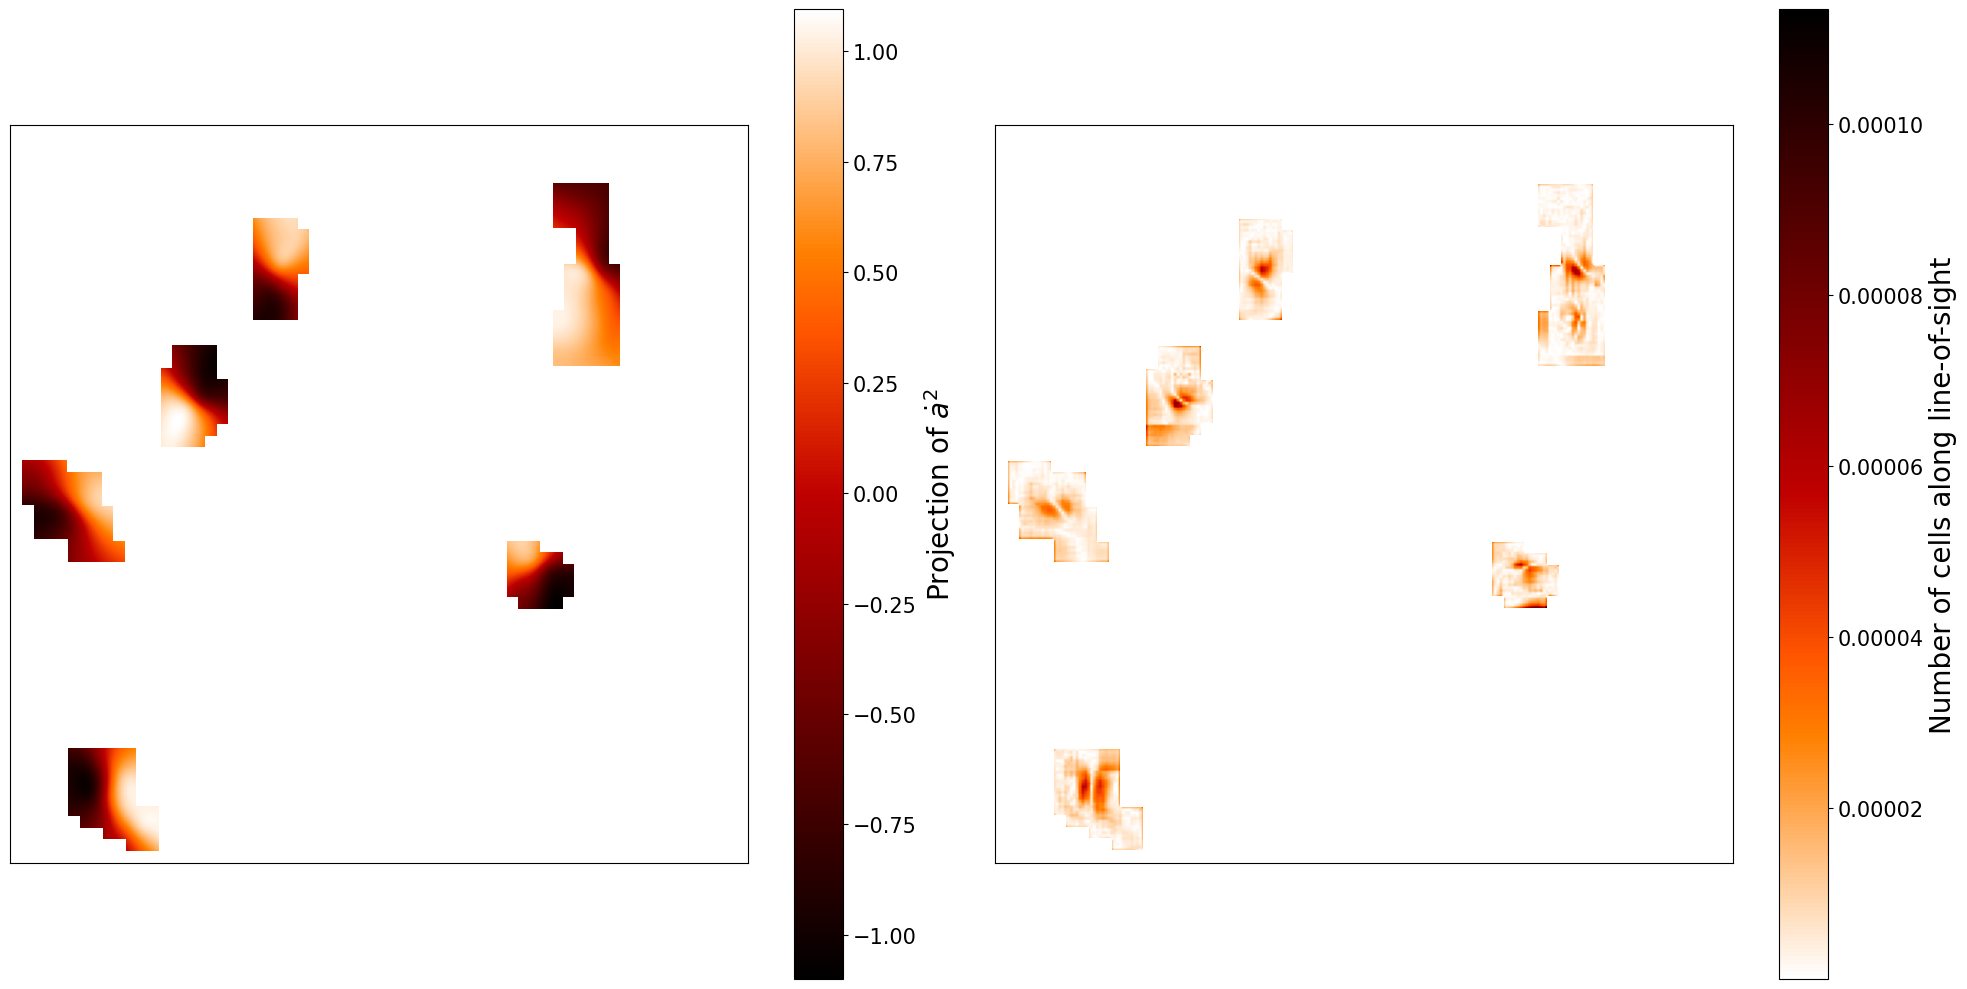

In [20]:
# Id of projection to be plotted.
# Plot.
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

im = ax[0].imshow(slices_1[name][:], cmap='gist_heat')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'Projection of $\dot{a}^2$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices_1[name+'_truncation_error'][:], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'Number of cells along line-of-sight',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

## Plot Slice

In [ ]:
# id of slice to be plotted
i = 1127
lev = 1

# Read a slice along the x-axis.
slices = out.GetSlice(i, 'x', lev, ['Psi1', 'Psi2'])
t = slices['t']
print('t='+str(t))

axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Load coarse box and plot a slice.

In [ ]:
# Id of coarse box to be plotted
i = 4

# Read coarse box and grab a slice.
coarse_box = out.GetCoarseBox(i, ['Psi1', 'Psi2'])
t = coarse_box['t']
print('t='+str(t))

axion = np.arctan2(coarse_box['Psi2'][:,:,0], coarse_box['Psi1'][:,:,0])
radial_mode = np.sqrt(coarse_box['Psi1'][:,:,0]**2 + coarse_box['Psi2'][:,:,0]**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Load a full box (at a finer level) and plot a slice.

In [ ]:
# Id of coarse box to be plotted
i = 3
level = 1

# Read coarse box and grab a slice. This output has been downsampled (see output.full_box_downsample_factor = 2)
full_box = out.GetFullBox(i, level, ['Psi1', 'Psi2'])
t = full_box['t']
print('t='+str(t))

axion = np.arctan2(full_box['Psi2'][:,:,0], full_box['Psi1'][:,:,0])
radial_mode = np.sqrt(full_box['Psi1'][:,:,0]**2 + full_box['Psi2'][:,:,0]**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Plot slice of truncation errors

In [ ]:
# Id of slice to be plotted.
i = 1
lev = 0

# Read a slice along the x-axis.
slices = out.GetSliceTruncationError(i, 'z', lev, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'], cmap='seismic')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

In [ ]:
# Id of slice to be plotted.
i = 1

# Read a slice along the x-axis.
slices = out.GetCoarseBoxTruncationError(i, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'][0], cmap='seismic')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'][0], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

In [ ]:
# Id of slice to be plotted.
i = 1
level = 1

# Read a slice along the x-axis.
slices = out.GetFullBoxTruncationError(i, level, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'][0], cmap='seismic')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'][0], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

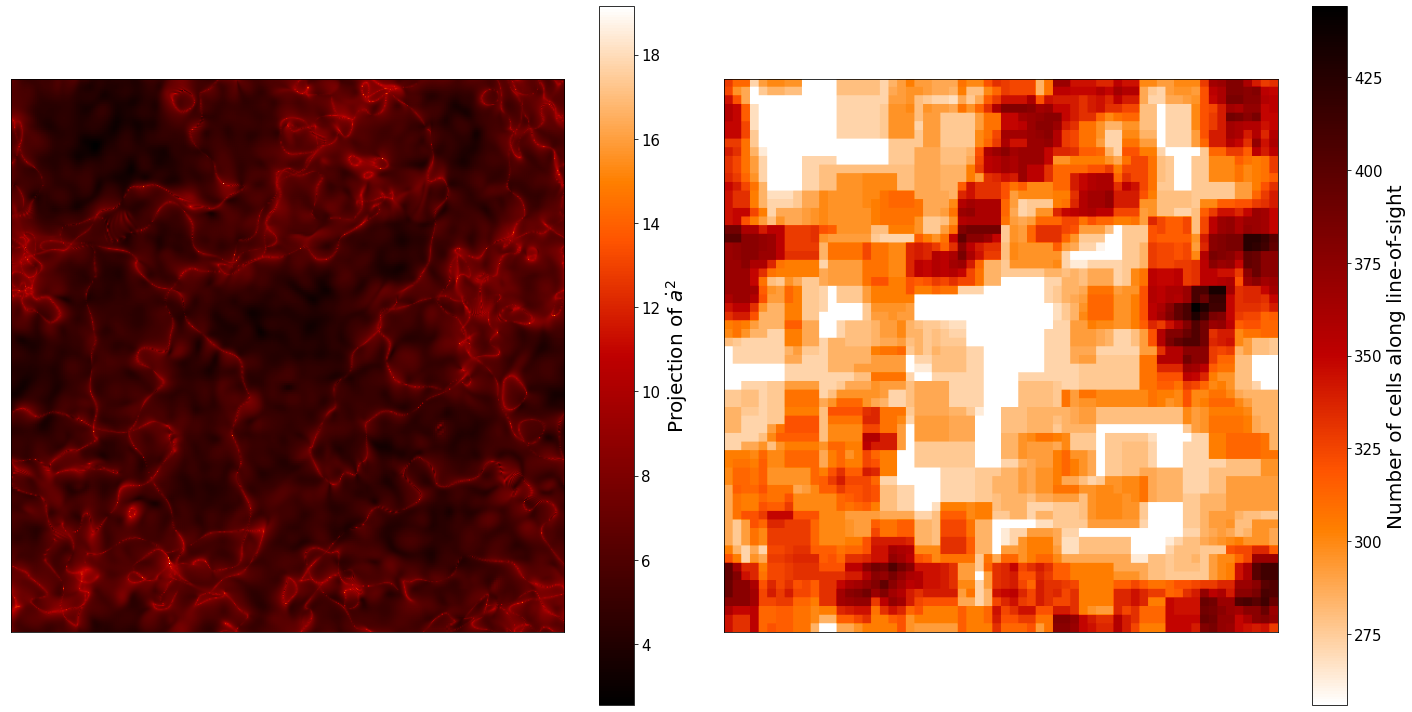

In [31]:
# Id of projection to be plotted.
i = 1700
# Read a slice along the x-axis.
projection   = out.GetProjection(i, ['a_prime2'])
projection_n = out.GetProjectionN(i, ['a_prime2'])
#t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

im = ax[0].imshow(np.log(projection['a_prime2']), cmap='gist_heat')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'Projection of $\dot{a}^2$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(projection_n['a_prime2'], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'Number of cells along line-of-sight',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

In [ ]:
i = 1

# Read a slice along the x-axis.
unbinned_spectra   = out.GetSpectrum(i, ['a_prime_screened'])
eta = unbinned_spectra['t']

# Bin the unbinned spectra.
k_mag = np.sqrt(unbinned_spectra['k_sq'])
k_bins = np.linspace(0, k_mag[-1], 128)
spectrum = np.histogram(k_mag, bins = k_bins, weights = unbinned_spectra['a_prime_screened'])[0]

# Plot.
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(k_bins[1:], spectrum/eta**2)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$k_{com}$",fontsize=18)
plt.ylabel(r"$\rho_k$",fontsize=18)

In [ ]:
spectrum